In [37]:
# Import the Pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

In [2]:
# Define the calculation of mean, deviation,and coefficients 
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

# Plot the scatter and linear regression diagrams
def plot_regression_line(x, y, b, x_label, y_label, title): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
        marker = "o", s = 30) 

    # predicted response vector 
    y_pred = b[0] + b[1]*x 

    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.title(title)
    plt.xlabel(x_label) 
    plt.ylabel(y_label) 

    # function to show plot 
    plt.show() 

In [3]:
# Read the csv file and add "_" to the column name of "Age Group"
csv_path = "data/ArrestByCounty-PopByCounty.csv"
csv_df = pd.read_csv(csv_path)
csv_df.columns = csv_df.columns.str.replace(' ', '_')

# Remove any null records
no_null_csv_df = csv_df.dropna(how='any')
print(f"Any null values in the dataframe: {csv_df.isnull().values.any()}")

Any null values in the dataframe: False


In [19]:
# Narrow down the columns and show the total count, as well as the max and min years
reduced_df = no_null_csv_df[["County","Year","Crime","Arrests","Which"]]
print(f"There are {len(reduced_df)} crime records between {reduced_df['Year'].min()} and {reduced_df['Year'].max()} in the Colordo counties.")
print()
pd.set_option('max_rows', 3)
print(reduced_df)
print()

There are 28207 crime records between 1992 and 2016 in the Colordo counties.

      County  Year               Crime  Arrests    Which
0      Adams  1992  Aggravated Assault     1654  Violent
...      ...   ...                 ...      ...      ...
28206   Yuma  2016             Robbery        0  Violent

[28207 rows x 5 columns]



In [5]:
# Filter the county for 'Teller' and 'El Paso' counties
county_df = reduced_df.loc[(reduced_df['County']=='Teller') | (reduced_df['County']=='El Paso'),:]
print(f"There are {len(county_df)} records for county Teller and El Paso")
print()

# All crimes are grouped into three categories - 'Violent' 'Property' 'Drug'
print(f"Three crime categories: {county_df['Which'].unique()}")

There are 896 records for county Teller and El Paso

Three crime categories: ['Violent' 'Property' 'Drug']


In [6]:
# Gengrate a new dataframe for the category of Property 
property_df = county_df.loc[(county_df['Which']=='Property'),:]
print(f"There are {len(property_df)} records in the Property crime category.")
print()

# List out the crimes belonged to the category of Property
print(f"Crims considered in the Property crime categor are: {property_df['Crime'].unique()}")

There are 400 records in the Property crime category.

Crims considered in the Property crime categor are: ['Arson' 'Burglary' 'Larceny/Theft' 'Motor Vehicle Theft']


In [7]:
# Gengrate a new dataframe for the category of Violent
violent_df = county_df.loc[(county_df['Which']=='Violent'),:]
print(f"There are {len(violent_df)} records in the Violent crime category.")
print()

# List out the crimes belonged to the category of Violent 
print(f"Crims considered in the Violent crime categor are: {violent_df['Crime'].unique()}")

There are 400 records in the Violent crime category.

Crims considered in the Violent crime categor are: ['Aggravated Assault' 'Forcible rape' 'Murder/Manslaughter' 'Robbery'
 'Forcible Rape']


In [8]:
# Gengrate a new dataframe for the category of Drug
drug_df = county_df.loc[(county_df['Which']=='Drug'),:]
print(f"There are {len(drug_df)} records in the Drug crime category.")
print()

# List out the crimes belonged to the category of Drug
print(f"Crims considered in the Drug crime categor are: {drug_df['Crime'].unique()}")

There are 96 records in the Drug crime category.

Crims considered in the Drug crime categor are: ['Drug Violations']


In [33]:
# Get the sum of Arrests in the category of Property 
property_years = property_df.groupby(['Year'])[['Arrests']].sum()
print(property_years.tail())

      Arrests
Year         
2012     3179
2013     3480
2014     4786
2015     4580
2016     4121


In [26]:
# Get the sum of Arrests in the category of Violent
violent_years = violent_df.groupby(['Year'])[['Arrests']].sum()
print(violent_years.tail())

      Arrests
Year         
2012      790
2013      858
2014      985
2015      976
2016     1162


In [27]:
# Get the sum of Arrests in the category of Drug
drug_years = drug_df.groupby(['Year'])[['Arrests']].sum()
print(drug_years.tail())


      Arrests
Year         
2012     1045
2013      934
2014     1190
2015     1240
2016     1320


       Arrests
Year          
2007  0.535947
2008  0.577216
2009  0.598603
2010  0.586286
2011  0.636987
2012  0.634025
2013  0.660091
2014  0.687545
2015  0.673926
2016  0.624110


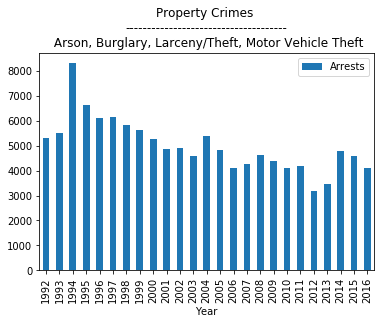

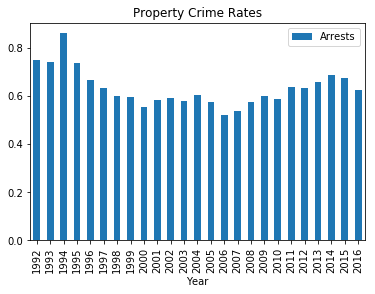

In [40]:
# Plot the Property Crimes diagram with the number of Arrests on the y-axis and years on the x-axis
property_years.plot.bar()
plt.title("Property Crimes \n-------------------------------------\n Arson, Burglary, Larceny/Theft, Motor Vehicle Theft")

# Get the total number of Arrests for each year
years_total = county_df.groupby(['Year']).sum()

# Plot the Property Crime Rates diagram with the Property rates on the y-axis and years on the x-axis
property_rates = property_years / years_total
property_rates.plot.bar()
plt.title("Property Crime Rates")

print(property_rates.tail(10))

Estimated coefficients:
b_0 = 8.657125572179382 nb_1 = -0.004004324458538366


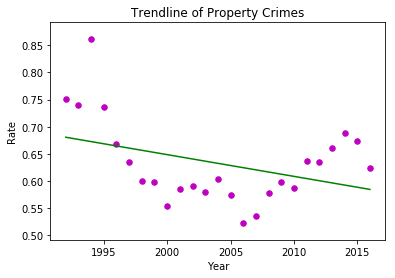

In [13]:
# Predict the trend of Property Crimes
X = pd.DataFrame(property_df['Year'].unique())
Y = pd.DataFrame(property_rates["Arrests"])
# observations 
x=np.array(X.values.tolist())
y= np.array(Y.values.tolist())

# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(b[0], b[1])) 

# plotting regression line 
plot_regression_line(x, y, b, "Year", "Rate", "Trendline of Property Crimes") 

       Arrests
Year          
2007  0.168211
2008  0.166813
2009  0.172282
2010  0.184335
2011  0.161915
2012  0.157559
2013  0.162747
2014  0.141503
2015  0.143614
2016  0.175981


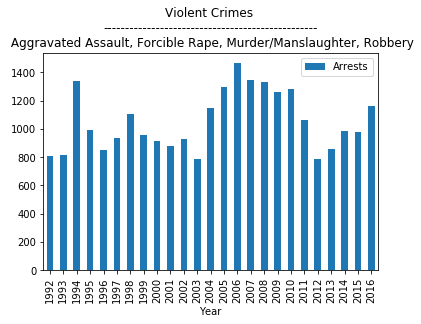

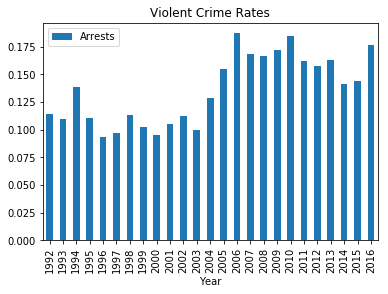

In [41]:
# Plot the Violent Crimes diagram with the number of Arrests on the y-axis and years on the x-axis
violent_years.plot.bar()
plt.title("Violent Crimes \n-------------------------------------------------\n Aggravated Assault, Forcible Rape, Murder/Manslaughter, Robbery")

# Plot the Violent Crime Rates diagram with the violent rates on the y-axis and years on the x-axis
violent_rates = violent_years / years_total
violent_rates.plot.bar()
plt.title("Violent Crime Rates")

print(violent_rates.tail(10))

Estimated coefficients:
b_0 = -6.089015526902526 nb_1 = 0.0031062183968011735


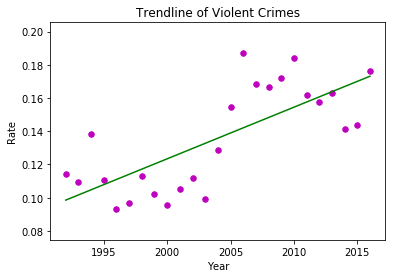

In [15]:
# Predict the trend of Violent Crimes
X = pd.DataFrame(property_df['Year'].unique())
Y = pd.DataFrame(violent_rates["Arrests"])
# observations 
x=np.array(X.values.tolist())
y= np.array(Y.values.tolist())
# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(b[0], b[1])) 

# plotting regression line 
plot_regression_line(x, y, b, "Year", "Rate", "Trendline of Violent Crimes") 

       Arrests
Year          
2010  0.229379
2011  0.201098
2012  0.208416
...        ...
2014  0.170952
2015  0.182460
2016  0.199909

[7 rows x 1 columns]


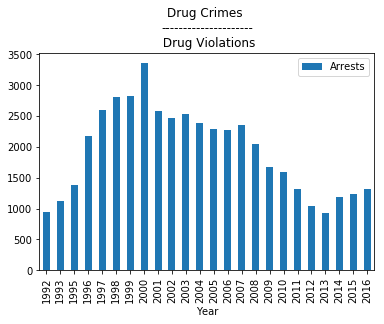

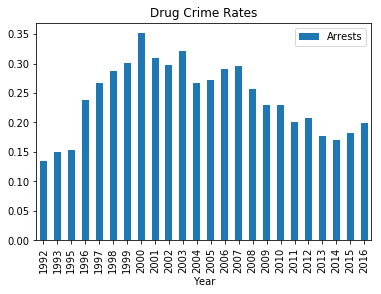

In [31]:
# Plot the Drug Crimes diagram with the number of Arrests on the y-axis and years on the x-axis
drug_years.plot.bar()
plt.title("Drug Crimes \n---------------------\n Drug Violations")

drug_years_df = county_df.loc[county_df['Year'] != 1994, :]
drug_total = drug_years_df.groupby(['Year']).sum()

# Plot the Drug Crime Rates diagram with the drug rates on the y-axis and years on the x-axis
drug_rates = drug_years / drug_total
drug_rates.plot.bar()
plt.title("Drug Crime Rates")

print(drug_rates.tail(7))

Estimated coefficients:
b_0 = 2.3297631892235557 nb_1 = -0.0010419064977394376


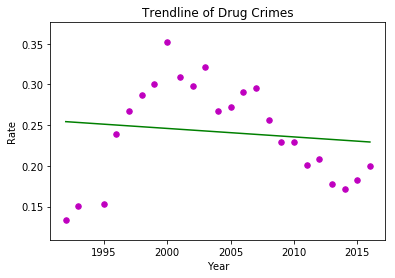

In [17]:
# Predict the trend of Drug Crimes
X = []
for i in range(1992, 2017):
    if i != 1994:
        #print(i)
        X.append(i)
        
X = pd.DataFrame(X)
Y = pd.DataFrame(drug_rates["Arrests"])
# observations  
x=np.array(X.values.tolist())
y= np.array(Y.values.tolist())
# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(b[0], b[1])) 

# plotting regression line 
plot_regression_line(x, y, b, "Year", "Rate", "Trendline of Drug Crimes") 
